In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv("train10k.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Columns: 1615 entries, name to mZagreb2
dtypes: float64(1279), int64(335), object(1)
memory usage: 118.3+ MB


In [3]:
train_df = train_df.fillna(0)

In [4]:
train_df = train_df.drop('name', axis=1)

In [5]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Example usage:
# evaluate_model(perceptron, X_train, X_test, y_train, y_test)

In [6]:
from sklearn.model_selection import train_test_split
Y = train_df[['cls']].copy()
X = train_df.drop(['cls'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)


In [8]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [9]:
from sklearn.metrics import accuracy_score, classification_report
# Testing and Evaluation
classifier.fit(X_train_normalized, y_train.T.values[0])
y_pred = classifier.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7152524726704841
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       942
           1       0.69      0.79      0.74       979

    accuracy                           0.72      1921
   macro avg       0.72      0.71      0.71      1921
weighted avg       0.72      0.72      0.71      1921



Accuracy: 0.7152524726704841
Precision: 0.6949458483754513
Recall: 0.7865168539325843
F1-Score: 0.7379012937230475
AUC-ROC: 0.7138529067964409
AUC-PR (Average Precision): 0.6553841236191762
Matthew's Correlation Coefficient (MCC): 0.4327596867405344
Log Loss: 10.263341178473235
Balanced Accuracy: 0.7138529067964408
Confusion Matrix:
[[604 338]
 [209 770]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       942
           1       0.69      0.79      0.74       979

    accuracy                           0.72      1921
   macro avg       0.72      0.71      0.71      1921
weighted avg       0.72      0.72      0.71      1921



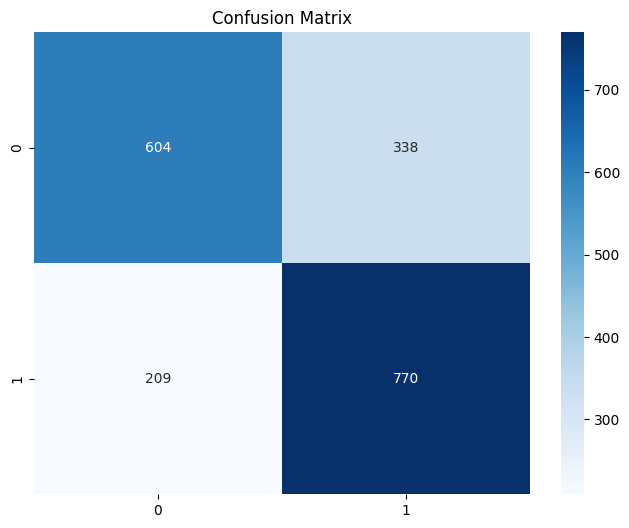

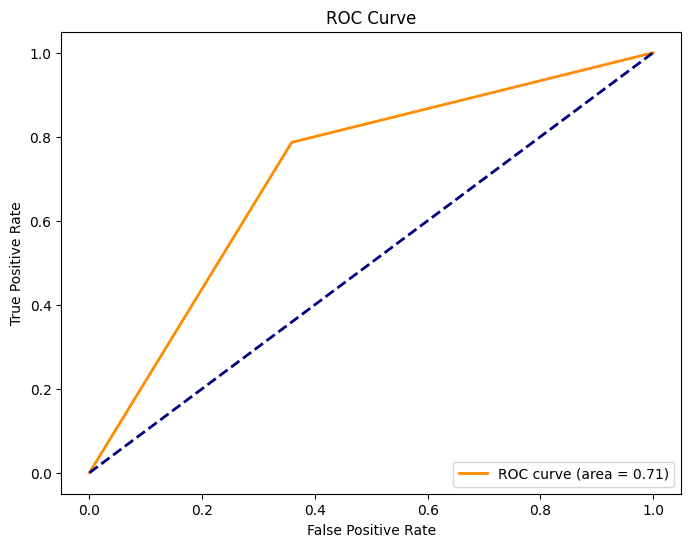

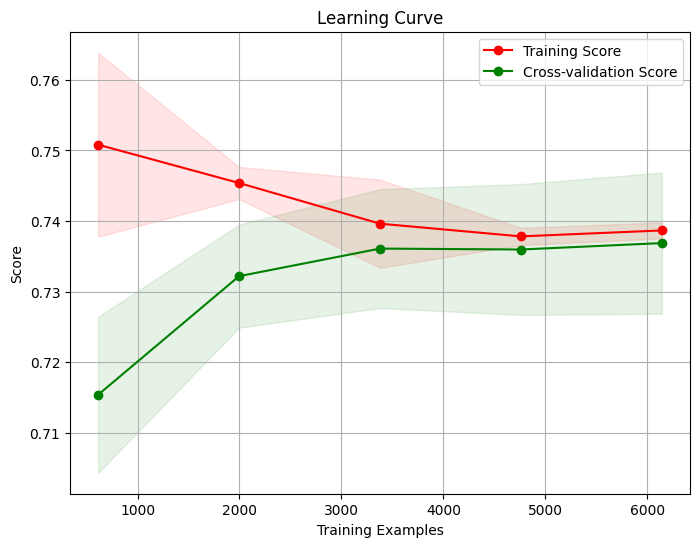

In [10]:
evaluate_model(classifier, X_train_normalized, X_test_normalized, y_train.T.values[0], y_test)